# Smith Kaart Oefening 3

In [1]:
from cursusdef import *

## Opgave

Wat is een Smith kaart? Welke waarde wordt er op deze kaart uitgezet? 
```{note}
Hiervoor verwijzen we naar het betreffende hoofdstuk uit de cursus.
```

Hoe gebruik je een Smith kaart om een antenne van 30 Ohm aan te passen aan een printbaan van 60 Ohm voor een frequentie van 1.2 GHz ($\lambda$= 12.5 cm)?

### Oplossing 1: Bijplaatsen van een capaciteit in serie

We plaatsen $z= \frac{Z_L}{Z_0}=\frac{1}{2}$ op de Smith kaart (rode dotje) en we zoeken waar we de r=1 cirkel snijden in het bovenste deel van de Smith kaart (groene dotje).

###### Smith kaart van de eerste oplossing.

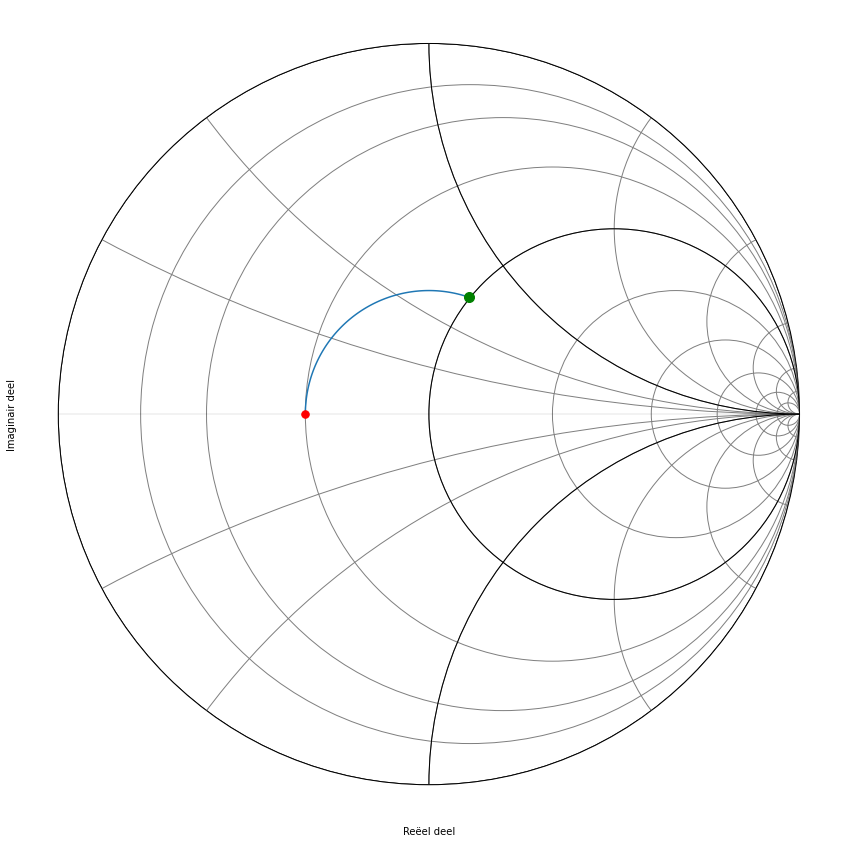

In [3]:
Z_L = 30
Z_0 = 60
f_0_str = '1.2GHz'
freq = rf.Frequency(start=1.10, stop=1.3, npoints=31, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(110)]
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
smitplot(zlijn,Z_0)

Als we van de aanpassing (groene dot) naar de belasting gaan (rode dot), draaien we in tegenwijzerzin over een afstand van $110^o$. Dit geeft een afstand van $\frac{110}{360}\frac{\lambda}{2}$=0.152 $\lambda$ = 1.9cm.    ($\lambda$= 12.5 cm is gegeven)

De nieuwe z = 1 + j 0.7. Daaruit volgt dat Z = 60 Ohm + j 42.4 Ohm (zie Table 1). Het complexe deel van deze impedantie kunnen we compenseren door een condensator met impedantie van ongeveer - j 42.4 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van de lijnimpedantie (zie Table 1) juist gaan kijken waar het reele deel 60 Ohm wordt en wat we dan als complex deel over houden.

$$ \frac{1}{j \omega C}= - j 42.4 \Omega$$

Als we vervolgens $\omega$ invullen, wetende dat de freqentie f=1.2GHz:

$$ \omega= 2 \pi \cdot  1.2\times 10^9 $$

$$ C= 3.1 pF  $$

In [ ]:
110/360/2*12.5

In [ ]:
1/42.4/1.2e9/2/np.pi

In [7]:
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(105,115)]
def zlijnprint(zlijn,golflengte=12.5):
    print('hoek    impedantie (Ohm)     lengte coax (cm)')
    for i,zi in zlijn:
        print('{:4}  Z= {:.2f}{:+.2f}j Ohm     lengte={:.2f} cm'.format(i,zi.real,zi.imag, i/360*golflengte/2))
zlijnprint(zlijn)

hoek    impedantie (Ohm)     lengte coax (cm)
 105  Z= 56.82+41.17j Ohm     lengte=1.82 cm
 106  Z= 57.51+41.46j Ohm     lengte=1.84 cm
 107  Z= 58.21+41.75j Ohm     lengte=1.86 cm
 108  Z= 58.93+42.03j Ohm     lengte=1.88 cm
 109  Z= 59.65+42.30j Ohm     lengte=1.89 cm
 110  Z= 60.39+42.56j Ohm     lengte=1.91 cm
 111  Z= 61.15+42.82j Ohm     lengte=1.93 cm
 112  Z= 61.92+43.06j Ohm     lengte=1.94 cm
 113  Z= 62.70+43.29j Ohm     lengte=1.96 cm
 114  Z= 63.50+43.50j Ohm     lengte=1.98 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
De optimale condensatorwaarde in serie wordt dus  3.1 pF en de nodige lengte van de coax tussen de antenne en de aanpassing is 1.9 cm
</p>

Het schema dat we nodig hebben om deze eerst oplossing te realiseren wordt dus:

###### circuit van de eerste oplossing.

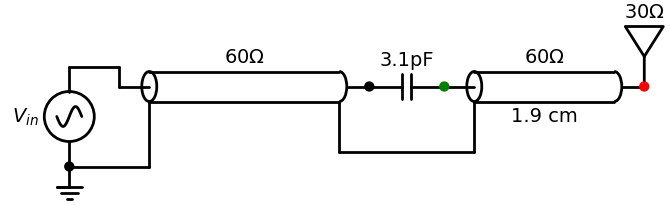

In [7]:
d = schemdraw.Drawing()
d.add(Ground())
d+=Dot()
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot())
d.add(Capacitor(l=1.5, label='3.1pF'))
d+=Dot(color='g')
coax2=d.add(Coax(l=1.5,length=4, label='$60\Omega$', botlabel='1.9 cm'))
d+=Dot(color='r')
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend,l=1,d='down'))
d.add(Line(tox=coax2.shieldstart,d='right') )     
d.add(Line(toy=coax2.shieldstart,d='up') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 2: Bijplaatsen van een inductantie in serie

We plaatsen $\frac{Z_L}{Z_0}=0.5$ op de Smith kaart en we zoeken waar we de r=1 cirkel snijden in het onderste deel van de kaart.

###### Smith kaart van de tweede oplossing.

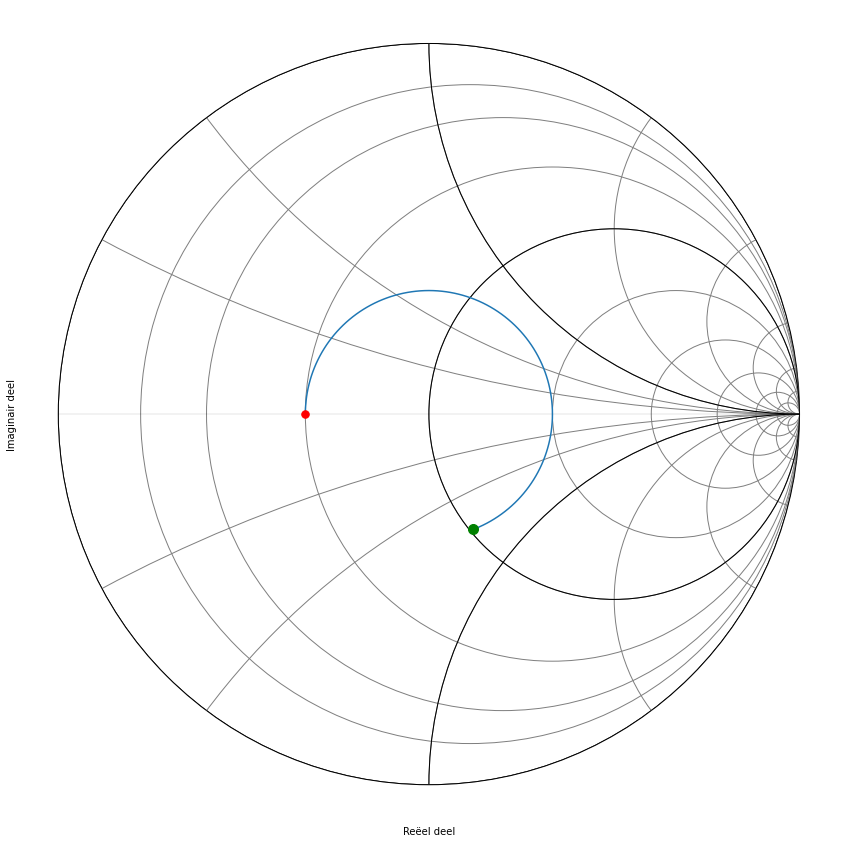

In [10]:
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(250)]
smitplot(zlijn,Z_0)

We zoomen vervolgens in op het deel van de cirkel die de eenheidscirkel snijdt.

In [11]:
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(245,255)]
zlijnprint(zlijn)

hoek    impedantie (Ohm)     lengte coax (cm)
 245  Z= 64.31-43.71j Ohm     lengte=4.25 cm
 246  Z= 63.50-43.50j Ohm     lengte=4.27 cm
 247  Z= 62.70-43.29j Ohm     lengte=4.29 cm
 248  Z= 61.92-43.06j Ohm     lengte=4.31 cm
 249  Z= 61.15-42.82j Ohm     lengte=4.32 cm
 250  Z= 60.39-42.56j Ohm     lengte=4.34 cm
 251  Z= 59.65-42.30j Ohm     lengte=4.36 cm
 252  Z= 58.93-42.03j Ohm     lengte=4.38 cm
 253  Z= 58.21-41.75j Ohm     lengte=4.39 cm
 254  Z= 57.51-41.46j Ohm     lengte=4.41 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [ ]:
zlijn

De nieuwe z = 1 - j 0.7. Daaruit volgt dat Z = 60 Ohm - j 42.4 Ohm. Het complexe deel van deze impedantie kunnen we compenseren door een spoel met impedantie van ongeveer  j 42.4 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van zlijn juist gaan kijken waar het reele deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ j \omega L=  j 42.4 \Omega$$

$$ \omega= 2 \pi \cdot 1.2 \times 10^9 $$

$$ L=5.6 nH $$

In [ ]:
42.4/2/np.pi/1.2e9

Het schema dat we nodig hebben om deze tweede oplossing te realiseren wordt dus:

###### circuit van de tweede oplossing.

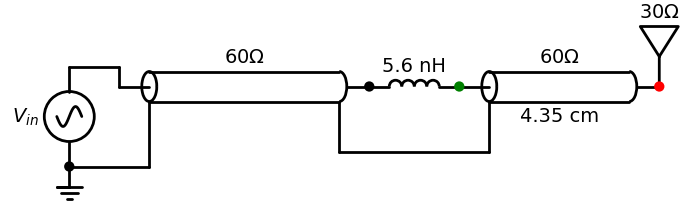

In [12]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d+=Dot()

d.add(Inductor(l=1.8, label='5.6 nH'))
d+=Dot(color='g')
coax2=d.add(Coax(l=1.5,length=4, label='$60\Omega$', botlabel='4.35 cm'))
d.add(Dot( color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend,l=1,d='down'))
d.add(Line(tox=coax2.shieldstart,d='right') )     
d.add(Line(toy=coax2.shieldstart,d='up') )     

d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

<p class="alert alert-success">
De optimale inductantiewaarde in serie wordt dus  5.6 nH en de nodige lengte van de coax tussen de antenne en de aanpassing is 4.35 cm
</p>

### Oplossing 3: Bijplaatsen van een capaciteit in parallel

We plaatsen $\frac{Z_L}{Z_0}=0.5$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

###### Smith kaart van de derde oplossing.

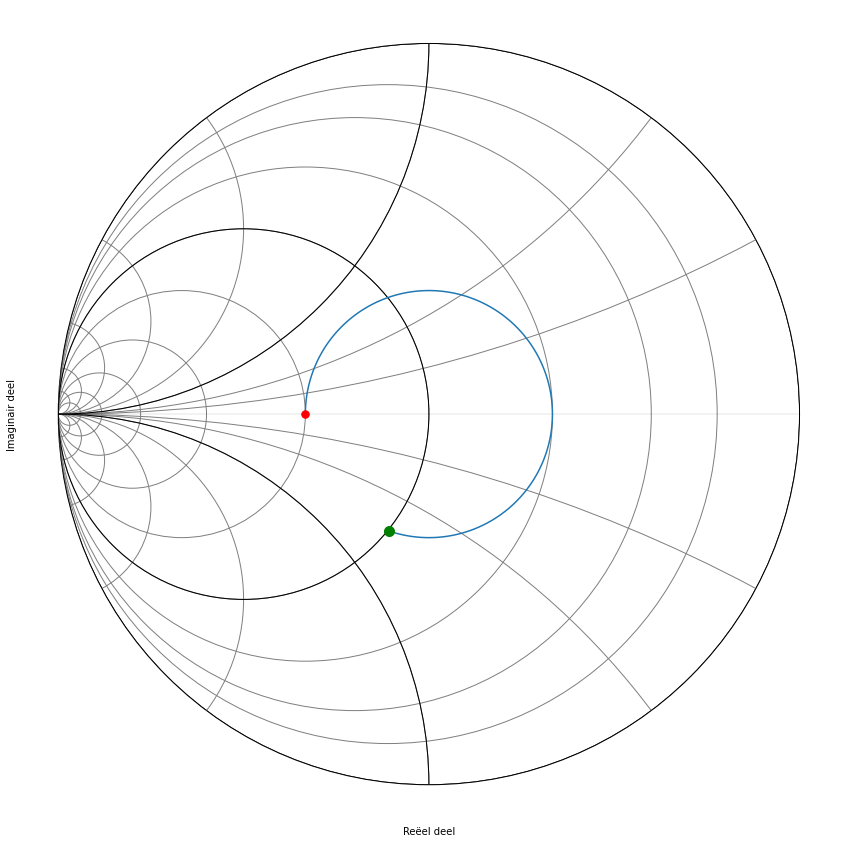

In [15]:
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,290)]
smitplot(zlijn,Z_0,tt='y')

Omdat een Smith kaart in admitantie het spiegelbeeld is van een Smith kaart in impedentie, kunnen we ook de kaart spiegelen. We moeten dan wel aan de andere kant van de kaart vertrekken. Dit is weergegeven in figuur 6.

###### Smith kaart van de derde oplossing als admitantie.

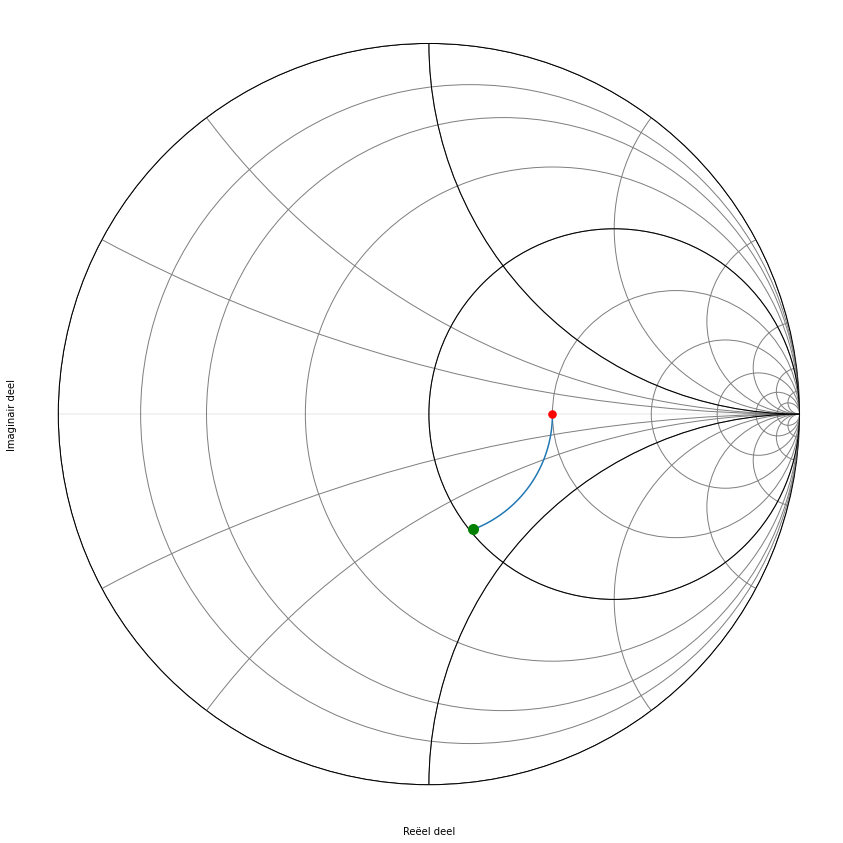

In [26]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,70)]
smitplot(ylijn,Y_0)

In [27]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(65,75)]
def ylijnprint(ylijn,golflengte=12.5):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  65    Y= 17.86-12.14j mS     lengte=1.13 cm
  66    Y= 17.64-12.08j mS     lengte=1.15 cm
  67    Y= 17.42-12.02j mS     lengte=1.16 cm
  68    Y= 17.20-11.96j mS     lengte=1.18 cm
  69    Y= 16.99-11.89j mS     lengte=1.20 cm
  70    Y= 16.78-11.82j mS     lengte=1.22 cm
  71    Y= 16.57-11.75j mS     lengte=1.23 cm
  72    Y= 16.37-11.68j mS     lengte=1.25 cm
  73    Y= 16.17-11.60j mS     lengte=1.27 cm
  74    Y= 15.98-11.52j mS     lengte=1.28 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

we zoeken nu de hoek die overeenkomt met een reeel deel van de admitantie van 16.66 mS

$$ j \omega C= 0.0118 j $$

$$ C =\frac{0.0118}{2 \pi \cdot 1.2 \times 10^9}=  1.56 pF $$

In [ ]:
0.0118/2/np.pi/1.2e9

<p class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  1.56 pF en  de nodige lengte van de coax tussen de antenne en de aanpassing is 1.22 cm 
</p>

Het schema dat we nodig hebben om deze derde oplossing te realiseren wordt dus:

###### circuit van de derde oplossing.

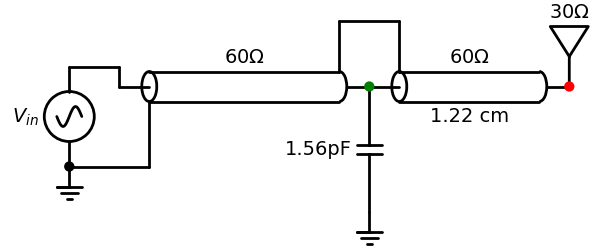

In [14]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
d.add(Capacitor(l=2.5,d='down', label='1.56pF'))
d.add(Ground())
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='1.22 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 4: Bijplaatsen van een spoel in parallel

We plaatsen $\frac{Z_0}{Z_L}=\frac{1}{2}$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

###### Smith kaart van de vierde oplossing.

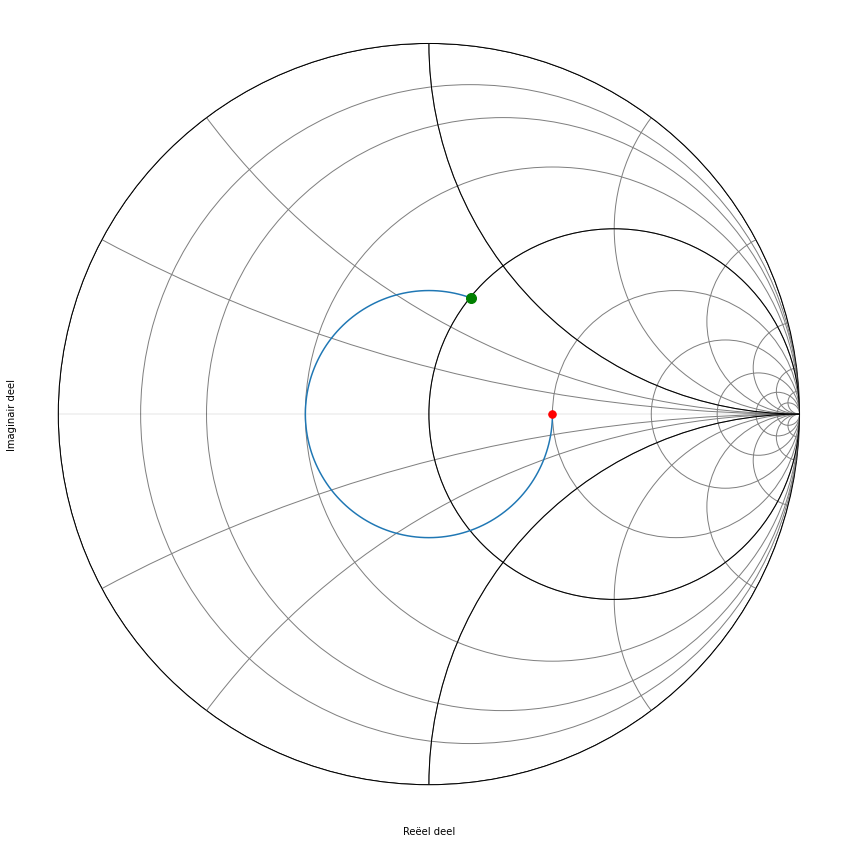

In [21]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,291)]
smitplot(ylijn,Y_0)

In [23]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(285,291)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 285    Y= 15.78+11.44j mS     lengte=4.95 cm
 286    Y= 15.98+11.52j mS     lengte=4.97 cm
 287    Y= 16.17+11.60j mS     lengte=4.98 cm
 288    Y= 16.37+11.68j mS     lengte=5.00 cm
 289    Y= 16.57+11.75j mS     lengte=5.02 cm
 290    Y= 16.78+11.82j mS     lengte=5.03 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

$$ \frac{1}{j \omega L}= - 0.0118 j $$

$$ L =\frac{1}{0.0118\cdot  2 \pi \cdot 1.2 \times 10^9}= 11.2 nH $$

In [ ]:
1/0.0118/2/np.pi/1.2e9

<p class="alert alert-success">
De optimale inductantiewaarde in parallel wordt dus  11.2 nH  de nodige lengte van de coax tussen de antenne en de aanpassing is 5 cm 
</p>

Het schema dat we nodig hebben om deze vierde oplossing te realiseren wordt dus:

###### circuit van de vierde oplossing.

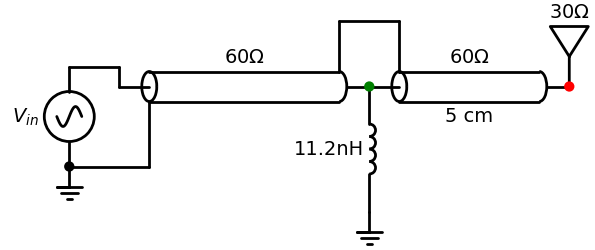

In [15]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
d.add(Inductor(l=2.5,d='down', label='11.2nH'))
d.add(Ground())
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='5 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 5: Oplossing 3 waarbij de condensator vervangen is door een open transmissielijn

De y = 1 - j 0.7 compenseren we door +j 0.7 vertrekkende vanuit g=0.

###### Smith kaart van de vijfde oplossing.

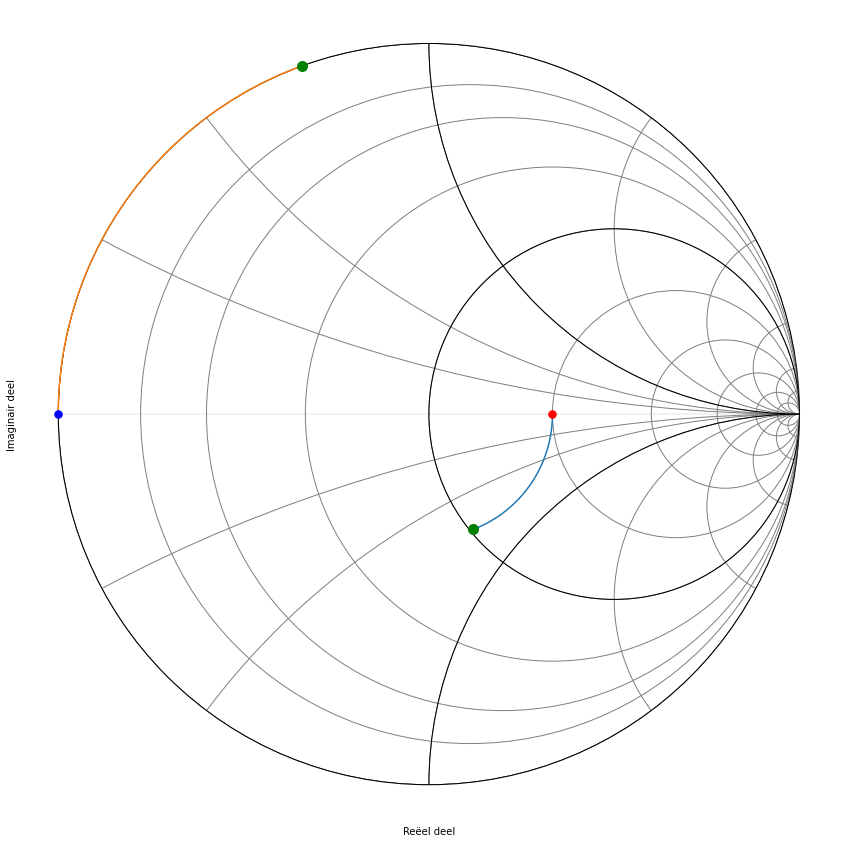

In [35]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,70)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,71)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

In [30]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(70,75)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  70    Y= 16.78-11.82j mS     lengte=1.22 cm
  71    Y= 16.57-11.75j mS     lengte=1.23 cm
  72    Y= 16.37-11.68j mS     lengte=1.25 cm
  73    Y= 16.17-11.60j mS     lengte=1.27 cm
  74    Y= 15.98-11.52j mS     lengte=1.28 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [34]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(70,75)]

def ylijnprint2(ylijn,golflengte=12.5):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  70       Y= +11.67j mS     lengte=1.22 cm
  71       Y= +11.89j mS     lengte=1.23 cm
  72       Y= +12.11j mS     lengte=1.25 cm
  73       Y= +12.33j mS     lengte=1.27 cm
  74       Y= +12.56j mS     lengte=1.28 cm


<p class=tabcaption> Overzicht van de bekomen admitantie van de open transmissielijn als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

Hieruit blijkt dat een open transmissielijn met de lengte van $\frac{71}{360} \frac{\lambda}{2}$ de beste aanpassing geeft.

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van de condensator is dus: 1.23 cm
</p>

Het schema dat we nodig hebben om deze vijfde oplossing te realiseren wordt dus:

###### circuit van de vijfde oplossing.

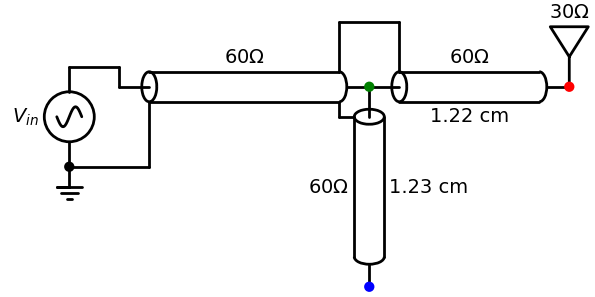

In [18]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label='$60\Omega$', botlabel='1.23 cm'))
d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))
d.add(Dot(xy=coax3.end,color='b'))
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='1.22 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 6: Oplossing 3 waarbij de condensator vervangen is door een kortgesloten transmissielijn

De y = 1 - j 0.7 compenseren we door +j 0.7 vertrekkende vanuit g=$\infty$

###### Smith kaart van de zesde oplossing.

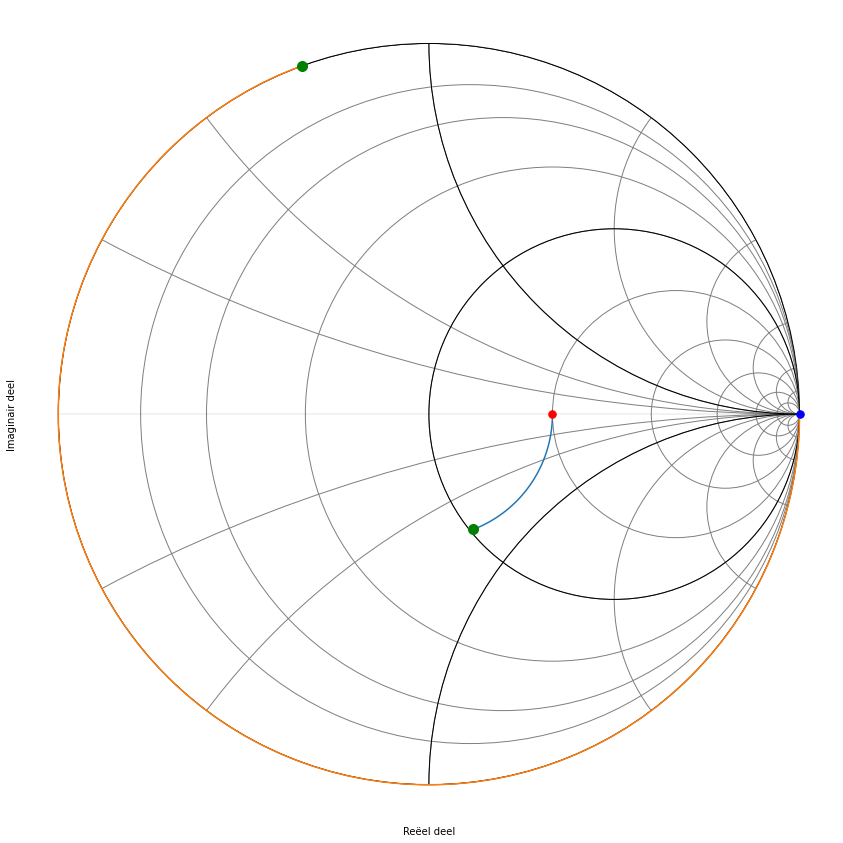

In [38]:
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(-180,71)]

smitplot2(ylijn,ykortlijn,Y_0)

In [40]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(70,75)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  70    Y= 16.78-11.82j mS     lengte=1.22 cm
  71    Y= 16.57-11.75j mS     lengte=1.23 cm
  72    Y= 16.37-11.68j mS     lengte=1.25 cm
  73    Y= 16.17-11.60j mS     lengte=1.27 cm
  74    Y= 15.98-11.52j mS     lengte=1.28 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [41]:
ykortlijn=[(i+180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(70,75)]
ylijnprint2(ykortlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 250       Y= +11.67j mS     lengte=4.34 cm
 251       Y= +11.89j mS     lengte=4.36 cm
 252       Y= +12.11j mS     lengte=4.38 cm
 253       Y= +12.33j mS     lengte=4.39 cm
 254       Y= +12.56j mS     lengte=4.41 cm


<p class=tabcaption> Overzicht van de bekomen admitantie van de kortgesloten transmissielijn als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van de condensator is dus: 4.35 cm
</p>

Het schema dat we nodig hebben om deze zesde oplossing te realiseren wordt dus:

###### circuit van de zesde oplossing.

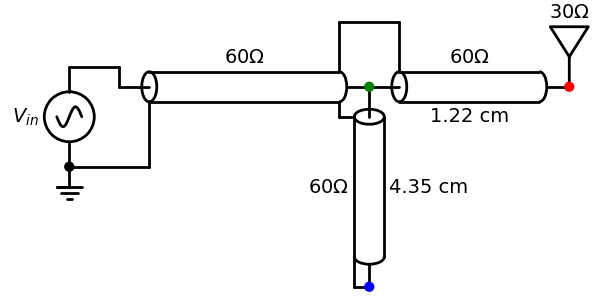

In [19]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label='$60\Omega$', botlabel='4.35 cm'))
d.add(Line(tox=coax3.shieldend,d='left'))
d.add(Line(toy=coax3.shieldend,d='up'))

d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))
d.add(Dot(xy=coax3.end,color='b'))
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='1.22 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 7: Oplossing 4 waarbij het spoel vervangen is door een open transmissielijn

De y = 1 + j 0.7 compenseren we door -j 0.7 vertrekkende vanuit g=0.

###### Smith kaart van de zevende oplossing.

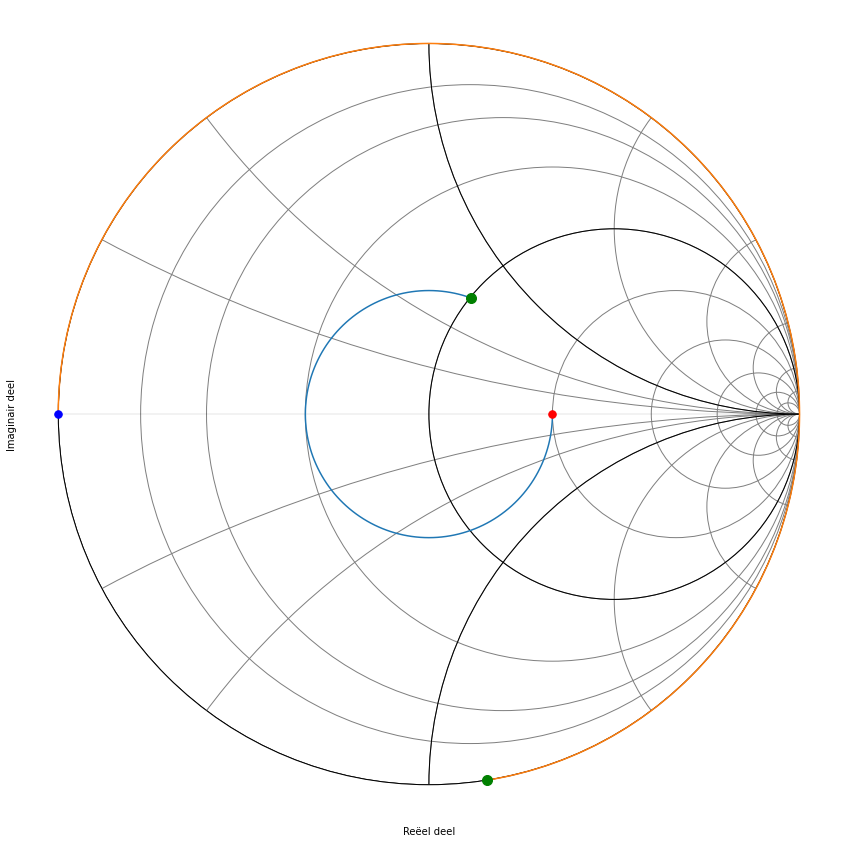

In [43]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,291)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,262)]
smitplot2(ylijn,yopenlijn,Y_0)

In [46]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(285,291)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 285    Y= 15.78+11.44j mS     lengte=4.95 cm
 286    Y= 15.98+11.52j mS     lengte=4.97 cm
 287    Y= 16.17+11.60j mS     lengte=4.98 cm
 288    Y= 16.37+11.68j mS     lengte=5.00 cm
 289    Y= 16.57+11.75j mS     lengte=5.02 cm
 290    Y= 16.78+11.82j mS     lengte=5.03 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [50]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(285,291)]
ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 285       Y= -12.79j mS     lengte=4.95 cm
 286       Y= -12.56j mS     lengte=4.97 cm
 287       Y= -12.33j mS     lengte=4.98 cm
 288       Y= -12.11j mS     lengte=5.00 cm
 289       Y= -11.89j mS     lengte=5.02 cm
 290       Y= -11.67j mS     lengte=5.03 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

Het schema dat we nodig hebben om deze zevende oplossing te realiseren wordt dus:

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van het spoel is dus: 5.03 cm
</p>

###### circuit van de zevende oplossing.

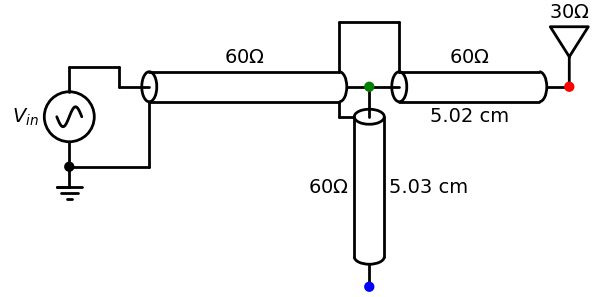

In [20]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label='$60\Omega$', botlabel='5.03 cm'))
d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))
d.add(Dot(xy=coax3.end,color='b'))
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='5.02 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 8: Oplossing 4 waarbij het spoel vervangen is door een kortgesloten transmissielijn


De y = 1 + j 0.7 compenseren we door -j 0.7 vertrekkende vanuit g=$\infty$. 

###### Smith kaart van de achtste oplossing.

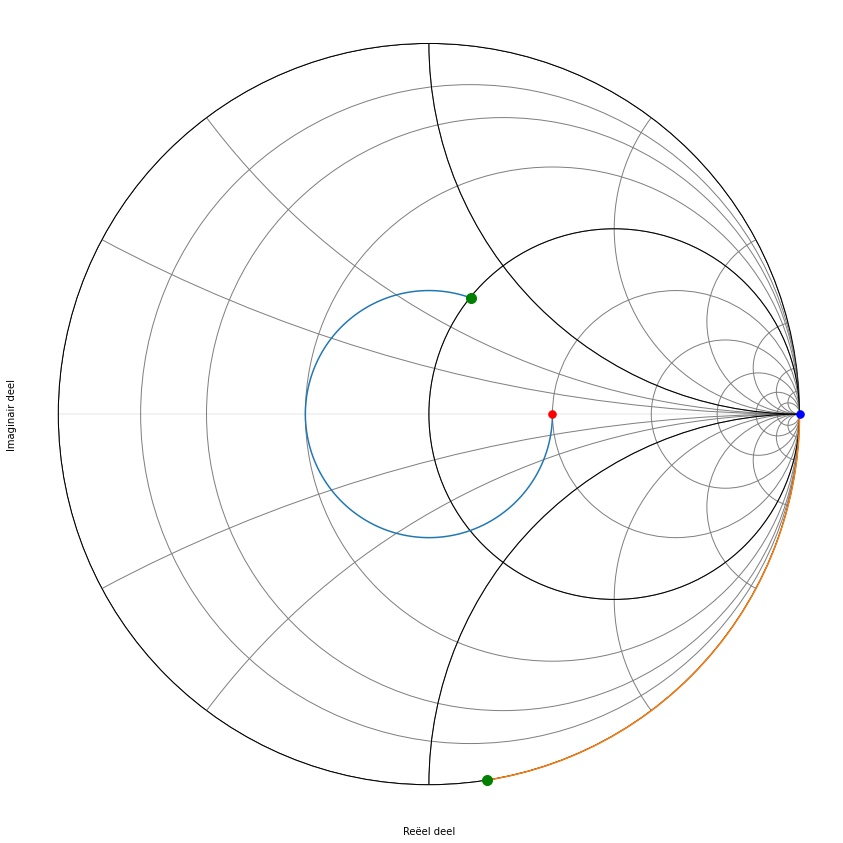

In [56]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(291)]
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(180,262)]
smitplot2(ylijn,ykortlijn,Y_0)

In [59]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(285,291)]
ylijnprint(ylijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 285    Y= 15.78+11.44j mS     lengte=4.95 cm
 286    Y= 15.98+11.52j mS     lengte=4.97 cm
 287    Y= 16.17+11.60j mS     lengte=4.98 cm
 288    Y= 16.37+11.68j mS     lengte=5.00 cm
 289    Y= 16.57+11.75j mS     lengte=5.02 cm
 290    Y= 16.78+11.82j mS     lengte=5.03 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [64]:
ykortlijn=[(i+180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(-75,-69)]
ylijnprint2(ykortlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 105       Y= -12.79j mS     lengte=1.82 cm
 106       Y= -12.56j mS     lengte=1.84 cm
 107       Y= -12.33j mS     lengte=1.86 cm
 108       Y= -12.11j mS     lengte=1.88 cm
 109       Y= -11.89j mS     lengte=1.89 cm
 110       Y= -11.67j mS     lengte=1.91 cm


<p class=tabcaption> Overzicht van de bekomen admitantie als funktie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van het spoel is dus: 1.9 cm
</p>

Het schema dat we nodig hebben om deze achtste oplossing te realiseren wordt dus:

###### circuit van de achtste oplossing.

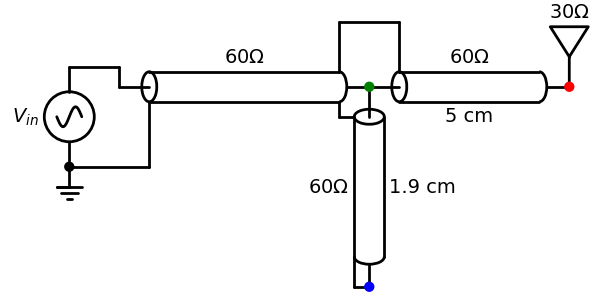

In [21]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label='$60\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label='$60\Omega$', botlabel='1.9 cm'))
d.add(Line(tox=coax3.shieldend,d='left'))
d.add(Line(toy=coax3.shieldend,d='up'))

d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))
d.add(Dot(xy=coax3.end,color='b'))
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label='$60\Omega$', botlabel='5 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label='$30\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()